# Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


/home/ai21btech11012/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [4]:
## If you need to install anything
# !pip install scikit-learn
# !pip install xgboost

In [2]:
# Read the CSV file
k = 7
df = pd.read_csv(f'../data/processed/combined/7_final.csv')

# Convert date column to datetime format (if not already)
df["date"] = pd.to_datetime(df["date"])

training_cutoff_date = pd.Timestamp("2010-01-01")

df = df[df["date"] > training_cutoff_date]

# Print the head of the dataframe
print(df.head())

# Print the shape of the dataframe
print(df.shape)


      player       team opposition       date  \
0  PJ Hughes  Australia  Sri Lanka 2013-01-11   
1  PJ Hughes  Australia  Sri Lanka 2013-01-13   
2  PJ Hughes  Australia  Sri Lanka 2013-01-18   
3  PJ Hughes  Australia  Sri Lanka 2013-01-20   
4  PJ Hughes  Australia  Sri Lanka 2013-01-23   

                                    venue  match_id player_id  fantasy_points  \
0                Melbourne Cricket Ground    573014  004c9e85             188   
1                           Adelaide Oval    573015  004c9e85               7   
2  Brisbane Cricket Ground, Woolloongabba    573016  004c9e85               7   
3                   Sydney Cricket Ground    573017  004c9e85               5   
4                          Bellerive Oval    573018  004c9e85             220   

   batting_fantasy_points  bowling_fantasy_points  ...  \
0                     184                       0  ...   
1                       3                       0  ...   
2                       3                   

In [3]:
# Convert to a list and print in a readable format
print(list(df.columns))


['player', 'team', 'opposition', 'date', 'venue', 'match_id', 'player_id', 'fantasy_points', 'batting_fantasy_points', 'bowling_fantasy_points', 'fielding_fantasy_points', 'Total_matches_played_sum', 'last_7_matches_fantasy_points_sum', 'last_7_matches_fantasy_points_var', 'date_diff', 'k_value', 'cumulative_Innings Batted_sum', 'last_7_matches_Innings Batted_sum', 'cumulative_Runs_sum', 'last_7_matches_Runs_sum', 'cumulative_Fours_sum', 'last_7_matches_Fours_sum', 'cumulative_Sixes_sum', 'last_7_matches_Sixes_sum', 'cumulative_Outs_sum', 'last_7_matches_Outs_sum', 'cumulative_Dot Balls_sum', 'last_7_matches_Dot Balls_sum', 'cumulative_Balls Faced_sum', 'last_7_matches_Balls Faced_sum', 'cumulative_Innings Bowled_sum', 'last_7_matches_Innings Bowled_sum', 'cumulative_Balls Bowled_sum', 'last_7_matches_Balls Bowled_sum', 'cumulative_Wickets_sum', 'last_7_matches_Wickets_sum', 'cumulative_LBWs_sum', 'last_7_matches_LBWs_sum', 'cumulative_Bowleds_sum', 'last_7_matches_Bowleds_sum', 'cumul

In [7]:
# The target variable is 'fantasy_points, I was hoping to have 3 fantasy points columns, each for batting, nowling and fielding. 
# Then, do some feature engineering using exploratory data analysis between predictors and target variable, for each of them.
# Also, find the correlation between the predictors and the target variable.
# Also, find the best k for rolling average for each of the predictors ? or the same k for all predictors ?
# Or some kind of transformation for the predictors, like log transformation, etc.
# Key components include feature creation from existing data, transforming and imputing missing or invalid features, 
# # reducing data dimensionality through methods like Principal Components Analysis (PCA), Independent Component Analysis (ICA), and Linear Discriminant Analysis (LDA), and selecting the most relevant features for model training based on importance scores and correlation matrices.[10]

In [8]:
# Feature explosion occurs when the number of identified features is too large for effective model estimation or optimization. Common causes include:

# Feature templates - implementing feature templates instead of coding new features
# Feature combinations - combinations that cannot be represented by a linear system
# Feature explosion can be limited via techniques such as: regularization, kernel methods, and feature selection.

In [26]:
batting_cols = [
    'player', 'team', 'opposition', 'date', 'venue', 'match_id', 'player_id', 'batting_fantasy_points',
    "Total_matches_played_sum", "cumulative_Innings Batted_sum", f"last_{k}_matches_Innings Batted_sum",
    "cumulative_Runs_sum", f"last_{k}_matches_Runs_sum", "cumulative_Fours_sum", f"last_{k}_matches_Fours_sum",
    "cumulative_Sixes_sum", f"last_{k}_matches_Sixes_sum", "cumulative_Outs_sum", f"last_{k}_matches_Outs_sum",
    "cumulative_Dot Balls_sum", f"last_{k}_matches_Dot Balls_sum", "cumulative_Balls Faced_sum",
    f"last_{k}_matches_Balls Faced_sum", f"last_{k}_matches_centuries_sum", f"last_{k}_matches_half_centuries_sum",
    f"last_{k}_matches_duck_outs_sum", "last_year_avg_Runs",
    "cumulative_derived_Batting Strike Rate", "cumulative_derived_Batting Avg", "cumulative_derived_Mean Score",
    "cumulative_derived_Boundary%", "cumulative_derived_Mean Balls Faced", "cumulative_derived_Dismissal Rate",
    f"last_{k}_matches_derived_Batting Strike Rate", f"last_{k}_matches_derived_Batting Avg", f"last_{k}_matches_derived_Mean Score",
    f"last_{k}_matches_derived_Boundary%", f"last_{k}_matches_derived_Mean Balls Faced", f"last_{k}_matches_derived_Dismissal Rate",
    "cumulative_Venue_Runs_sum", f"last_{k}_matches_Venue_Runs_sum", "cumulative_Opposition_Runs_sum",
    f"last_{k}_matches_Opposition_Runs_sum",
    "venue_avg_runs_sum"
]

print(batting_cols.__len__())
df_batting = df[batting_cols].copy()


44


In [ ]:
# batting_cols = [
#     'player', 'team', 'opposition', 'date', 'venue', 'match_id', 'player_id', 
#     'batting_fantasy_points', 'cumulative_Innings Batted_sum', 'last_7_matches_Innings Batted_sum',
#     'cumulative_Runs_sum', 'last_7_matches_Runs_sum', 'cumulative_Fours_sum', 'last_7_matches_Fours_sum',
#     'cumulative_Sixes_sum', 'last_7_matches_Sixes_sum', 'cumulative_Outs_sum', 'last_7_matches_Outs_sum',
#     'cumulative_Dot Balls_sum', 'last_7_matches_Dot Balls_sum', 'cumulative_Balls Faced_sum', 'last_7_matches_Balls Faced_sum',
#     'last_7_matches_centuries_sum', 'last_7_matches_half_centuries_sum', 'last_7_matches_duck_outs_sum',
#     'last_year_avg_Runs', 'cumulative_derived_Batting Strike Rate', 'cumulative_derived_Batting Avg',
#     'cumulative_derived_Mean Score', 'cumulative_derived_Boundary%', 'cumulative_derived_Mean Balls Faced',
#     'cumulative_derived_Dismissal Rate', 'last_7_matches_derived_Batting Strike Rate', 'last_7_matches_derived_Batting Avg',
#     'last_7_matches_derived_Mean Score', 'last_7_matches_derived_Boundary%', 'last_7_matches_derived_Mean Balls Faced',
#     'last_7_matches_derived_Dismissal Rate', 'venue_avg_runs_sum', 'cumulative_Venue_Runs_sum', 'last_7_matches_Venue_Runs_sum',
#     'cumulative_Venue_Innings Batted_sum', 'last_7_matches_Venue_Innings Batted_sum',
#     'cumulative_Opposition_Runs_sum', 'last_7_matches_Opposition_Runs_sum', 'cumulative_Opposition_Innings Batted_sum',
#     'last_7_matches_Opposition_Innings Batted_sum', 'cumulative_Inning_Runs_sum', 'last_7_matches_Inning_Runs_sum',
#     'cumulative_Inning_Innings Batted_sum', 'last_7_matches_Inning_Innings Batted_sum'
# ]

print(batting_cols.__len__())
df_batting = df[batting_cols].copy()

51


### EDA for Batting df

Missing Values:
 Series([], dtype: int64)


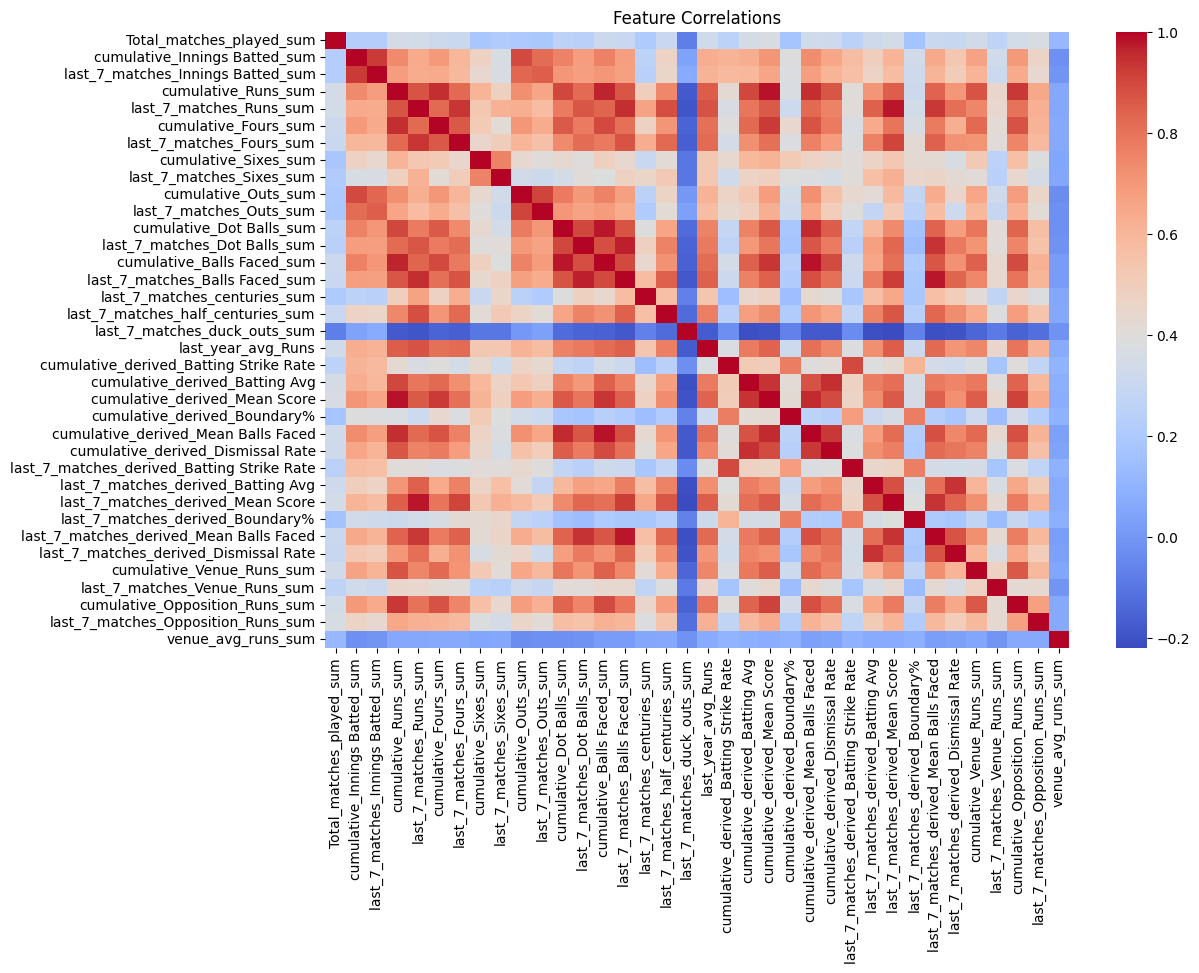

In [27]:
# 1. Check for missing values
missing_values = df_batting.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


# 2. Separate categorical and numerical columns
categorical_cols = ['player', 'team', 'opposition', 'date', 'venue',  'match_id', 'player_id']
numerical_cols = [col for col in df_batting.columns if col not in categorical_cols and col != 'batting_fantasy_points']

# 4. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_batting[numerical_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlations")
plt.show()


In [28]:
# 1. Correlation Analysis to Identify Important Features
numerical_cols_with_target = numerical_cols + ['batting_fantasy_points']
correlation_matrix = df[numerical_cols_with_target].corr()

# Get correlation of features with target variable
target_correlation = correlation_matrix["batting_fantasy_points"].abs().sort_values(ascending=False)
print(target_correlation)

batting_fantasy_points                        1.000000
cumulative_Runs_sum                           0.395881
cumulative_Fours_sum                          0.385699
cumulative_Balls Faced_sum                    0.382185
cumulative_derived_Mean Score                 0.381606
cumulative_Opposition_Runs_sum                0.376172
last_7_matches_Runs_sum                       0.368242
cumulative_derived_Mean Balls Faced           0.367641
last_7_matches_Balls Faced_sum                0.362616
last_year_avg_Runs                            0.361309
cumulative_Dot Balls_sum                      0.361235
last_7_matches_Fours_sum                      0.358393
cumulative_Venue_Runs_sum                     0.356461
last_7_matches_derived_Mean Score             0.350992
last_7_matches_Dot Balls_sum                  0.344673
last_7_matches_derived_Mean Balls Faced       0.344068
cumulative_derived_Batting Avg                0.335851
cumulative_Outs_sum                           0.328997
cumulative

In [32]:
# 2. Dropping Highly Correlated Features
# Highly correlated features can cause multicollinearity, leading to redundancy in the model.

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr().abs()

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs of columns with correlation greater than threshold (e.g., 0.85)
correlated_pairs = []
high_correlation_features = set()
threshold = 0.9

for col in upper_tri.columns:
    for row in upper_tri.index:
        if upper_tri.loc[row, col] > threshold:
            correlated_pairs.append((row, col, upper_tri.loc[row, col]))
            high_correlation_features.add(col)  # Mark the second column for removal

# Convert to DataFrame for better readability
correlated_df = pd.DataFrame(correlated_pairs, columns=["Feature_1", "Feature_2", "Correlation"])

# Drop highly correlated features
df_reduced = df.drop(columns=list(high_correlation_features))

# Print results
print(f"Highly correlated feature pairs (features with correlation > {threshold}):")
# print(correlated_df.sort_values(by="Correlation", ascending=False))

print(f"\nDropped features due to high correlation: {list(high_correlation_features)}")
print(f"Number of dropped features: {len(high_correlation_features)}")
correlated_df.sort_values(by="Correlation", ascending=False)


Highly correlated feature pairs (features with correlation > 0.9):

Dropped features due to high correlation: ['last_7_matches_Fours_sum', 'cumulative_Dot Balls_sum', 'cumulative_derived_Mean Balls Faced', 'cumulative_Balls Faced_sum', 'cumulative_derived_Mean Score', 'cumulative_Opposition_Runs_sum', 'last_7_matches_derived_Dismissal Rate', 'last_7_matches_Balls Faced_sum', 'cumulative_Fours_sum', 'last_7_matches_Outs_sum', 'last_7_matches_Innings Batted_sum', 'cumulative_derived_Batting Avg', 'last_7_matches_derived_Mean Balls Faced', 'cumulative_derived_Dismissal Rate', 'last_7_matches_derived_Mean Score', 'last_7_matches_Dot Balls_sum']
Number of dropped features: 16


,Feature_1,Feature_2,Correlation
17,cumulative_Balls Faced_sum,cumulative_derived_Mean Balls Faced,0.983464
11,cumulative_Runs_sum,cumulative_derived_Mean Score,0.983283
7,cumulative_Dot Balls_sum,cumulative_Balls Faced_sum,0.979334
21,last_7_matches_Runs_sum,last_7_matches_derived_Mean Score,0.978229
26,last_7_matches_Balls Faced_sum,last_7_matches_derived_Mean Balls Faced,0.976575
9,last_7_matches_Dot Balls_sum,last_7_matches_Balls Faced_sum,0.970577
6,cumulative_Runs_sum,cumulative_Balls Faced_sum,0.963058
16,cumulative_Dot Balls_sum,cumulative_derived_Mean Balls Faced,0.956328
18,cumulative_derived_Mean Score,cumulative_derived_Mean Balls Faced,0.952683
8,last_7_matches_Runs_sum,last_7_matches_Balls Faced_sum,0.952317


In [13]:
def compute_vif(df, numerical_cols):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numerical_cols
    vif_data["VIF"] = [variance_inflation_factor(df[numerical_cols].values, i) for i in range(len(numerical_cols))]
    return vif_data

vif_df = compute_vif(df, numerical_cols)

threshold = 10

# Identify features with high VIF (threshold > 5 or 10)
high_vif_features = vif_df[vif_df["VIF"] > threshold]["Feature"].tolist()

# Drop features with high VIF
df_reduced = df.drop(columns=high_vif_features)

# Print results
print("Features with high VIF (indicating multicollinearity):")
print(vif_df.sort_values(by="VIF", ascending=False))

print(f"\nDropped features due to high VIF: {high_vif_features}")
print(f"Number of dropped features: {len(high_vif_features)}")


Features with high VIF (indicating multicollinearity):
                                        Feature            VIF
3                           cumulative_Runs_sum  561309.908763
35               cumulative_match_type_Runs_sum  551105.788891
4                      last_10_matches_Runs_sum   63776.367101
36          last_10_matches_match_type_Runs_sum   62319.920150
13                   cumulative_Balls Faced_sum   19088.559601
11                     cumulative_Dot Balls_sum    5140.667286
14              last_10_matches_Balls Faced_sum    2035.302482
5                          cumulative_Fours_sum     849.058067
12                last_10_matches_Dot Balls_sum     522.468304
1                 cumulative_Innings Batted_sum     464.742064
27           last_10_matches_derived_Mean Score     369.627230
29     last_10_matches_derived_Mean Balls Faced     343.320157
21                cumulative_derived_Mean Score     291.171882
23          cumulative_derived_Mean Balls Faced     272.843463


### Define a generic function for train and evaluate 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


# Function to train and evaluate models, and return predictions from the best model
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    best_model = None
    best_rmse = float("inf")
    best_predictions = None

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        # Store results
        results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2 Score": r2, "MAPE": mape}

        # Track the best model (lowest RMSE)
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_predictions = y_pred

    return pd.DataFrame(results).T, best_predictions

##  Feature Importance from Tree-Based Models (Random Forest)
1. Tree-based models like Random Forest, XGBoost, or LightGBM assign feature importance based on how much they reduce impurity (e.g., Gini impurity in classification or variance in regression).
2. More important features appear higher in the trees and contribute more to predictions.

Advantages:

✅ Captures non-linear relationships.
✅ Can handle multicollinearity well.
✅ Works well with both small & large datasets.
✅ Can be used with missing values.

Disadvantages:

❌ Can be computationally expensive for large datasets.
❌ Feature importance can fluctuate if the dataset is small.

In [30]:
# Split data
X = df[numerical_cols_with_target].drop(columns=["batting_fantasy_points"])
y = df["batting_fantasy_points"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Define threshold
importance_threshold = 0.01  # Adjust based on dataset

# Select important features
batting_selected_features_rf = feature_importance[feature_importance > importance_threshold].index.tolist()

# Drop unimportant features
df_reduced = df[batting_selected_features_rf + ["batting_fantasy_points"]]

print("Dropped features due to low importance:", set(X.columns) - set(batting_selected_features_rf))
print("Number of dropped features:", len(set(X.columns) - set(batting_selected_features_rf)))

Dropped features due to low importance: {'last_7_matches_duck_outs_sum', 'last_7_matches_half_centuries_sum', 'last_7_matches_centuries_sum', 'last_7_matches_Outs_sum', 'last_7_matches_Innings Batted_sum'}
Number of dropped features: 5


In [31]:
# Define cutoff date
cutoff_date = pd.Timestamp("2025-02-18")

# Split based on date
train_data = df[df["date"] < cutoff_date]
test_data = df[df["date"] >= cutoff_date]

# Select features (excluding 'date')
X_train, y_train = train_data[batting_selected_features_rf], train_data["batting_fantasy_points"]
X_test, y_test = test_data[batting_selected_features_rf], test_data["batting_fantasy_points"]

# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    # "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    # "SVR (Support Vector Regression)": SVR(kernel="rbf"),
    "XGBRegressor": XGBRegressor(n_estimators=500, learning_rate=0.05)
}

# Train and evaluate
batting_results, predicted_batting_points = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Print model performance
print(batting_results)

/home/ai21btech11012/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.183e+07, tolerance: 8.154e+03
  model = cd_fast.enet_coordinate_descent(


                           MSE       RMSE        MAE  R2 Score          MAPE
Linear Regression  2158.842231  46.463343  32.116569  0.208293  1.848946e+16
Ridge Regression   2158.827003  46.463179  32.116374  0.208298  1.849140e+16
Lasso Regression   2156.132956  46.434179  32.080470  0.209286  1.851603e+16
XGBRegressor       2176.200693  46.649766  31.700371  0.201927  1.597482e+16


## 2. Mutual Information (MI) for Feature Selection
1. Mutual Information (MI) measures how much information a feature provides about the target.
2. Unlike correlation, MI detects non-linear dependencies.

Advantages:

✅ Captures non-linear relationships.
✅ Works well for both continuous & categorical features.
✅ Not affected by multicollinearity.

Disadvantages:

❌ Computationally expensive for large datasets.
❌ Less intuitive compared to correlation.

When to Use?

When non-linear relationships exist between features and target.


In [17]:
from sklearn.feature_selection import mutual_info_regression

# Compute MI scores
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Define threshold
mi_threshold = 0.03  # Adjust based on dataset

# Select features
batting_selected_features_MI = mi_scores[mi_scores > mi_threshold].index.tolist()

# Drop unimportant features
df_reduced_MI = df[batting_selected_features_MI + ["batting_fantasy_points"]]

print("Dropped features due to low mutual information:", set(X.columns) - set(batting_selected_features_MI))

Dropped features due to low mutual information: {'league_avg_runs_sum', 'last_10_matches_Venue_Runs_sum', 'venue_avg_runs_sum', 'Total_matches_played_sum', 'last_10_matches_duck_outs_sum'}


In [18]:
# # Convert date column to datetime format (if not already)
# df["date"] = pd.to_datetime(df["date"])

# # Define cutoff date
# cutoff_date = pd.Timestamp("2024-08-31")

# # Split based on date
# train_data = df[df["date"] < cutoff_date]
# test_data = df[df["date"] >= cutoff_date]

# # Select features (excluding 'date')
# X_train, y_train = train_data[batting_selected_features_MI], train_data["batting_fantasy_points"]
# X_test, y_test = test_data[batting_selected_features_MI], test_data["batting_fantasy_points"]

# # Define models to test
# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge Regression": Ridge(alpha=1.0),
#     "Lasso Regression": Lasso(alpha=0.01),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "SVR (Support Vector Regression)": SVR(kernel="rbf"),
#     "XGBRegressor": XGBRegressor(n_estimators=500, learning_rate=0.05)
# }

# # Train and evaluate
# batting_results2, predicted_batting_points2 = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# # Print model performance
# print(batting_results2)

## 3. Recursive Feature Elimination (RFE)
1. RFE iteratively removes the least important feature and retrains the model.
2. Stops when it reaches the optimal feature subset.

Advantages:

✅ Works with any model (linear, tree-based, etc.).
✅ Automatically chooses the best subset of features.
✅ Helps reduce overfitting.

Disadvantages:

❌ Computationally expensive for large feature sets.
❌ Needs hyperparameter tuning for n_features_to_select.

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define model
model = LinearRegression()

# RFE selector
n_features_to_select = 20  # Adjust the number of features
rfe = RFE(model, n_features_to_select=n_features_to_select)  
rfe.fit(X, y)

# Select important features
batting_selected_features_RFE = X.columns[rfe.support_].tolist()

# Drop unimportant features
df_reduced_RFE = df[batting_selected_features_RFE + ["batting_fantasy_points"]]

print("Dropped features due to low importance from RFE:", set(X.columns) - set(batting_selected_features_RFE))

print("Number of dropped features:", len(set(X.columns) - set(batting_selected_features_RFE)))

Dropped features due to low importance from RFE: {'cumulative_Venue_Runs_sum', 'league_avg_runs_sum', 'last_10_matches_derived_Mean Balls Faced', 'last_10_matches_derived_Boundary%', 'last_10_matches_derived_Dismissal Rate', 'last_10_matches_Fours_sum', 'last_10_matches_Opposition_Runs_sum', 'last_10_matches_Venue_Runs_sum', 'cumulative_match_type_Runs_sum', 'last_10_matches_Dot Balls_sum', 'cumulative_Opposition_Runs_sum', 'last_10_matches_centuries_sum', 'cumulative_Sixes_sum', 'cumulative_Balls Faced_sum', 'cumulative_Fours_sum', 'cumulative_Dot Balls_sum', 'last_10_matches_Sixes_sum', 'cumulative_derived_Batting Avg', 'last_10_matches_Balls Faced_sum'}
Number of dropped features: 19


In [20]:
# # Convert date column to datetime format (if not already)
# df["date"] = pd.to_datetime(df["date"])

# # Define cutoff date
# cutoff_date = pd.Timestamp("2024-08-31")

# # Split based on date
# train_data = df[df["date"] < cutoff_date]
# test_data = df[df["date"] >= cutoff_date]

# # Select features (excluding 'date')
# X_train, y_train = train_data[batting_selected_features_RFE], train_data["batting_fantasy_points"]
# X_test, y_test = test_data[batting_selected_features_RFE], test_data["batting_fantasy_points"]

# # Define models to test
# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge Regression": Ridge(alpha=1.0),
#     "Lasso Regression": Lasso(alpha=0.01),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "SVR (Support Vector Regression)": SVR(kernel="rbf"), 
#     "XGBRegressor": XGBRegressor(n_estimators=500, learning_rate=0.05)
# }

# # Train and evaluate
# batting_results3, predicted_batting_points3 = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# # Print model performance
# print(batting_results3)

In [ ]:
# bowling_cols = [
#     'player', 'team', 'opposition', 'date', 'venue', 'match_type', 'match_id', 'player_id', 'bowling_fantasy_points',
#     "Total_matches_played_sum", "cumulative_Innings Bowled_sum", f"last_{k}_matches_Innings Bowled_sum",
#     "cumulative_Balls Bowled_sum", f"last_{k}_matches_Balls Bowled_sum", "cumulative_Wickets_sum", f"last_{k}_matches_Wickets_sum",
#     "cumulative_LBWs_sum", f"last_{k}_matches_LBWs_sum", "cumulative_Bowleds_sum", f"last_{k}_matches_Bowleds_sum",
#     "cumulative_Extras_sum", f"last_{k}_matches_Extras_sum", "cumulative_Maiden Overs_sum", f"last_{k}_matches_Maiden Overs_sum",
#     "cumulative_Runsgiven_sum", f"last_{k}_matches_Runsgiven_sum", "cumulative_Dot Balls Bowled_sum",
#     f"last_{k}_matches_Dot Balls Bowled_sum", "cumulative_Foursgiven_sum", f"last_{k}_matches_Foursgiven_sum",
#     "cumulative_Sixesgiven_sum", f"last_{k}_matches_Sixesgiven_sum", f"last_{k}_matches_3wickets_sum",
#     f"last_{k}_matches_4wickets_sum", f"last_{k}_matches_5wickets_sum", "last_year_avg_Wickets",
#     "cumulative_derived_Economy Rate", "cumulative_derived_Bowling Dot Ball%", "cumulative_derived_Boundary Given%",
#     "cumulative_derived_Bowling Avg", "cumulative_derived_Bowling Strike Rate",
#     f"last_{k}_matches_derived_Economy Rate", f"last_{k}_matches_derived_Bowling Dot Ball%",
#     f"last_{k}_matches_derived_Boundary Given%", f"last_{k}_matches_derived_Bowling Avg",
#     f"last_{k}_matches_derived_Bowling Strike Rate", "cumulative_Venue_Wickets_sum",
#     f"last_{k}_matches_Venue_Wickets_sum", "cumulative_Opposition_Wickets_sum", f"last_{k}_matches_Opposition_Wickets_sum",
#     "cumulative_match_type_Wickets_sum", f"last_{k}_matches_match_type_Wickets_sum", "venue_avg_wickets_sum", "league_avg_wickets_sum"
# ]

# print(bowling_cols.__len__())
# df_bowling = df[bowling_cols].copy()

54


KeyError: "['match_type', 'last_7_matches_3wickets_sum', 'cumulative_match_type_Wickets_sum', 'last_7_matches_match_type_Wickets_sum', 'league_avg_wickets_sum'] not in index"

In [13]:
bowling_cols = [
    'player', 'team', 'opposition', 'date', 'venue', 'match_id', 'player_id', "Total_matches_played_sum",
    'bowling_fantasy_points', 'cumulative_Innings Bowled_sum', 'last_7_matches_Innings Bowled_sum',
    'cumulative_Balls Bowled_sum', 'last_7_matches_Balls Bowled_sum', 'cumulative_Wickets_sum', 'last_7_matches_Wickets_sum',
    'cumulative_LBWs_sum', 'last_7_matches_LBWs_sum', 'cumulative_Bowleds_sum', 'last_7_matches_Bowleds_sum',
    'cumulative_Extras_sum', 'last_7_matches_Extras_sum', 'cumulative_Maiden Overs_sum', 'last_7_matches_Maiden Overs_sum',
    'cumulative_Runsgiven_sum', 'last_7_matches_Runsgiven_sum', 'cumulative_Dot Balls Bowled_sum', 'last_7_matches_Dot Balls Bowled_sum',
    'cumulative_Foursgiven_sum', 'last_7_matches_Foursgiven_sum', 'cumulative_Sixesgiven_sum', 'last_7_matches_Sixesgiven_sum',
    'last_7_matches_4wickets_sum', 'last_7_matches_5wickets_sum', 'last_7_matches_6wickets_sum',
    'last_year_avg_Wickets', 'cumulative_derived_Economy Rate', 'cumulative_derived_Bowling Dot Ball%',
    'cumulative_derived_Boundary Given%', 'cumulative_derived_Bowling Avg', 'cumulative_derived_Bowling Strike Rate',
    'last_7_matches_derived_Economy Rate', 'last_7_matches_derived_Bowling Dot Ball%', 'last_7_matches_derived_Boundary Given%',
    'last_7_matches_derived_Bowling Avg', 'last_7_matches_derived_Bowling Strike Rate', 'venue_avg_wickets_sum',
    'cumulative_Venue_Wickets_sum', 'last_7_matches_Venue_Wickets_sum', 'cumulative_Venue_Innings Bowled_sum',
    'last_7_matches_Venue_Innings Bowled_sum', 'cumulative_Opposition_Wickets_sum', 'last_7_matches_Opposition_Wickets_sum',
    'cumulative_Opposition_Innings Bowled_sum', 'last_7_matches_Opposition_Innings Bowled_sum',
    'cumulative_Inning_Wickets_sum', 'last_7_matches_Inning_Wickets_sum', 'cumulative_Inning_Innings Bowled_sum',
    'last_7_matches_Inning_Innings Bowled_sum'
]


print(bowling_cols.__len__())
df_bowling = df[bowling_cols].copy()


58


In [14]:
bowling_numerical_cols = [col for col in df_bowling.columns if col not in categorical_cols and col != 'bowling_fantasy_points']


In [15]:
# 1. Correlation Analysis to Identify Important Features
bowling_numerical_cols_with_target = bowling_numerical_cols + ['bowling_fantasy_points']
correlation_matrix = df[bowling_numerical_cols_with_target].corr()

# Get correlation of features with target variable
target_correlation = correlation_matrix["bowling_fantasy_points"].abs().sort_values(ascending=False)
print(target_correlation)

bowling_fantasy_points                          1.000000
last_7_matches_Dot Balls Bowled_sum             0.591926
cumulative_Dot Balls Bowled_sum                 0.589142
last_7_matches_Balls Bowled_sum                 0.588402
cumulative_Balls Bowled_sum                     0.584974
cumulative_Runsgiven_sum                        0.570841
last_7_matches_Runsgiven_sum                    0.567626
cumulative_Wickets_sum                          0.560276
last_7_matches_Innings Bowled_sum               0.550399
cumulative_Inning_Wickets_sum                   0.550184
cumulative_Innings Bowled_sum                   0.547228
cumulative_Foursgiven_sum                       0.542670
last_7_matches_Wickets_sum                      0.539553
cumulative_Inning_Innings Bowled_sum            0.536148
cumulative_Opposition_Wickets_sum               0.534999
last_7_matches_Foursgiven_sum                   0.534280
last_7_matches_Inning_Innings Bowled_sum        0.528635
cumulative_Opposition_Innings B

In [24]:
# 2. Dropping Highly Correlated Features
# Highly correlated features can cause multicollinearity, leading to redundancy in the model.

# Compute the correlation matrix
corr_matrix = df[bowling_numerical_cols].corr().abs()

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs of columns with correlation greater than threshold (e.g., 0.85)
correlated_pairs = []
high_correlation_features = set()
threshold = 0.9

for col in upper_tri.columns:
    for row in upper_tri.index:
        if upper_tri.loc[row, col] > threshold:
            correlated_pairs.append((row, col, upper_tri.loc[row, col]))
            high_correlation_features.add(col)  # Mark the second column for removal

# Convert to DataFrame for better readability
correlated_df = pd.DataFrame(correlated_pairs, columns=["Feature_1", "Feature_2", "Correlation"])

# Drop highly correlated features
df_reduced = df.drop(columns=list(high_correlation_features))

# Print results
print(f"Highly correlated feature pairs (features with correlation > {threshold}):")
# print(correlated_df.sort_values(by="Correlation", ascending=False))

print(f"\nDropped features due to high correlation: {list(high_correlation_features)}")
print(f"Number of dropped features: {len(high_correlation_features)}")
correlated_df.sort_values(by="Correlation", ascending=False)


Highly correlated feature pairs (features with correlation > 0.9):

Dropped features due to high correlation: ['cumulative_Bowleds_sum', 'last_10_matches_derived_Bowling Strike Rate', 'cumulative_Wickets_sum', 'cumulative_derived_Bowling Dot Ball%', 'cumulative_Sixesgiven_sum', 'last_10_matches_Wickets_sum', 'last_10_matches_derived_Bowling Dot Ball%', 'cumulative_derived_Bowling Strike Rate', 'cumulative_Foursgiven_sum', 'cumulative_Dot Balls Bowled_sum', 'last_10_matches_Runsgiven_sum', 'last_10_matches_Dot Balls Bowled_sum', 'last_10_matches_Balls Bowled_sum', 'cumulative_Runsgiven_sum', 'last_10_matches_match_type_Wickets_sum', 'cumulative_Balls Bowled_sum', 'cumulative_Opposition_Wickets_sum', 'cumulative_match_type_Wickets_sum', 'last_10_matches_Foursgiven_sum']
Number of dropped features: 19


,Feature_1,Feature_2,Correlation
44,cumulative_Wickets_sum,cumulative_match_type_Wickets_sum,0.999986
51,last_10_matches_Wickets_sum,last_10_matches_match_type_Wickets_sum,0.999797
12,cumulative_Balls Bowled_sum,cumulative_Dot Balls Bowled_sum,0.994358
7,cumulative_Balls Bowled_sum,cumulative_Runsgiven_sum,0.994074
18,last_10_matches_Balls Bowled_sum,last_10_matches_Dot Balls Bowled_sum,0.987227
16,cumulative_Runsgiven_sum,cumulative_Dot Balls Bowled_sum,0.985357
10,last_10_matches_Balls Bowled_sum,last_10_matches_Runsgiven_sum,0.979515
32,cumulative_derived_Bowling Avg,cumulative_derived_Bowling Strike Rate,0.978457
13,cumulative_Wickets_sum,cumulative_Dot Balls Bowled_sum,0.977997
47,cumulative_Dot Balls Bowled_sum,cumulative_match_type_Wickets_sum,0.977984


In [25]:
def compute_vif(df, numerical_cols):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numerical_cols
    vif_data["VIF"] = [variance_inflation_factor(df[numerical_cols].values, i) for i in range(len(numerical_cols))]
    return vif_data

vif_df = compute_vif(df, bowling_numerical_cols)

threshold = 10

# Identify features with high VIF (threshold > 5 or 10)
high_vif_features = vif_df[vif_df["VIF"] > threshold]["Feature"].tolist()

# Drop features with high VIF
df_reduced = df.drop(columns=high_vif_features)

# Print results
print("Features with high VIF (indicating multicollinearity):")
print(vif_df.sort_values(by="VIF", ascending=False))

print(f"\nDropped features due to high VIF: {high_vif_features}")
print(f"Number of dropped features: {len(high_vif_features)}")


Features with high VIF (indicating multicollinearity):
                                        Feature           VIF
5                        cumulative_Wickets_sum  55009.974281
41            cumulative_match_type_Wickets_sum  54979.750284
3                   cumulative_Balls Bowled_sum  17771.995365
15                     cumulative_Runsgiven_sum  10102.888386
17              cumulative_Dot Balls Bowled_sum   5949.588403
6                   last_10_matches_Wickets_sum   3780.436069
42       last_10_matches_match_type_Wickets_sum   3739.112032
4              last_10_matches_Balls Bowled_sum   3008.298965
16                last_10_matches_Runsgiven_sum   1761.730333
18         last_10_matches_Dot Balls Bowled_sum    963.525997
19                    cumulative_Foursgiven_sum    764.422138
20               last_10_matches_Foursgiven_sum    165.585507
44                       league_avg_wickets_sum    138.097161
32         last_10_matches_derived_Economy Rate     99.198952
31       cumula

In [16]:
# Split data
X = df[bowling_numerical_cols_with_target].drop(columns=["bowling_fantasy_points"])
y = df["bowling_fantasy_points"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Define threshold
importance_threshold = 0.01  # Adjust based on dataset

# Select important features
bowling_selected_features = feature_importance[feature_importance > importance_threshold].index.tolist()

# Drop unimportant features
df_reduced = df[bowling_selected_features + ["bowling_fantasy_points"]]

print("Dropped features due to low importance:", set(X.columns) - set(bowling_selected_features))
print("Number of dropped features:", len(set(X.columns) - set(bowling_selected_features)))

Dropped features due to low importance: {'cumulative_Opposition_Innings Bowled_sum', 'last_7_matches_Inning_Innings Bowled_sum', 'last_7_matches_Wickets_sum', 'last_7_matches_5wickets_sum', 'last_7_matches_Innings Bowled_sum', 'last_7_matches_Maiden Overs_sum', 'last_7_matches_LBWs_sum', 'last_7_matches_Bowleds_sum', 'last_7_matches_Venue_Innings Bowled_sum', 'last_7_matches_Sixesgiven_sum', 'cumulative_Inning_Innings Bowled_sum', 'last_7_matches_4wickets_sum', 'cumulative_Innings Bowled_sum', 'cumulative_Venue_Innings Bowled_sum', 'last_7_matches_Opposition_Innings Bowled_sum', 'last_7_matches_6wickets_sum'}
Number of dropped features: 16


In [17]:
# Convert date column to datetime format (if not already)
df["date"] = pd.to_datetime(df["date"])


# Split based on date
train_data = df[df["date"] < cutoff_date]
test_data = df[df["date"] >= cutoff_date]

# Select features (excluding 'date')
X_train, y_train = train_data[bowling_selected_features], train_data["bowling_fantasy_points"]
X_test, y_test = test_data[bowling_selected_features], test_data["bowling_fantasy_points"]

# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    # "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    # "SVR (Support Vector Regression)": SVR(kernel="rbf"),
        "XGBRegressor": XGBRegressor(n_estimators=500, learning_rate=0.05)
}

# Train and evaluate
bowling_results, predicted_bowling_points = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Print model performance
print(bowling_results)

/home/ai21btech11012/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.461e+06, tolerance: 4.559e+03
  model = cd_fast.enet_coordinate_descent(


                                        MSE       RMSE        MAE  R2 Score  \
Linear Regression                623.012374  24.960216  15.360073  0.437516   
Ridge Regression                 623.008405  24.960136  15.359966  0.437520   
Lasso Regression                 622.972341  24.959414  15.346664  0.437552   
Random Forest                    659.278681  25.676423  14.851333  0.404773   
SVR (Support Vector Regression)  682.471492  26.124155  13.989240  0.383834   
XGBRegressor                     665.422087  25.795777  14.772860  0.399227   

                                         MAPE  
Linear Regression                8.813497e+15  
Ridge Regression                 8.812571e+15  
Lasso Regression                 8.691781e+15  
Random Forest                    7.537592e+15  
SVR (Support Vector Regression)  1.939665e+15  
XGBRegressor                     6.343740e+15  


In [ ]:
# fielding_cols = [
#     'player', 'team', 'opposition', 'date', 'venue', 'match_id', 'player_id', 
#     'fielding_fantasy_points', "Total_matches_played_sum", "cumulative_Stumpings_sum", f"last_{k}_matches_Stumpings_sum",
#     "cumulative_Catches_sum", f"last_{k}_matches_Catches_sum", "cumulative_direct run_outs_sum",
#     f"last_{k}_matches_direct run_outs_sum", "cumulative_indirect run_outs_sum",
#     f"last_{k}_matches_indirect run_outs_sum"
# ]

# print(fielding_cols.__len__())
# df_fielding = df[fielding_cols].copy()

17


In [18]:
fielding_cols = [
    'player', 'team', 'opposition', 'date', 'venue', 'match_id', 'player_id', "Total_matches_played_sum",
    'fielding_fantasy_points', 'cumulative_Stumpings_sum', 'last_7_matches_Stumpings_sum',
    'cumulative_Catches_sum', 'last_7_matches_Catches_sum', 'cumulative_direct run_outs_sum', 'last_7_matches_direct run_outs_sum',
    'cumulative_indirect run_outs_sum', 'last_7_matches_indirect run_outs_sum'
]

print(fielding_cols.__len__())
df_fielding = df[fielding_cols].copy()


17


In [19]:
fielding_numerical_cols = [col for col in df_fielding.columns if col not in categorical_cols and col != 'fielding_fantasy_points']

In [20]:
# 1. Correlation Analysis to Identify Important Features
fielding_numerical_cols_with_target = fielding_numerical_cols + ['fielding_fantasy_points']
correlation_matrix = df[fielding_numerical_cols_with_target].corr()

# Get correlation of features with target variable
target_correlation = correlation_matrix["fielding_fantasy_points"].abs().sort_values(ascending=False)
print(target_correlation)

fielding_fantasy_points                 1.000000
cumulative_Catches_sum                  0.304400
cumulative_Stumpings_sum                0.284642
last_7_matches_Catches_sum              0.275552
last_7_matches_Stumpings_sum            0.245589
cumulative_indirect run_outs_sum        0.188553
last_7_matches_indirect run_outs_sum    0.138858
Total_matches_played_sum                0.098011
cumulative_direct run_outs_sum          0.019489
last_7_matches_direct run_outs_sum      0.014423
Name: fielding_fantasy_points, dtype: float64


In [31]:
# 2. Dropping Highly Correlated Features
# Highly correlated features can cause multicollinearity, leading to redundancy in the model.

# Compute the correlation matrix
corr_matrix = df[fielding_numerical_cols].corr().abs()

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs of columns with correlation greater than threshold (e.g., 0.85)
correlated_pairs = []
high_correlation_features = set()
threshold = 0.9

for col in upper_tri.columns:
    for row in upper_tri.index:
        if upper_tri.loc[row, col] > threshold:
            correlated_pairs.append((row, col, upper_tri.loc[row, col]))
            high_correlation_features.add(col)  # Mark the second column for removal

# Convert to DataFrame for better readability
correlated_df = pd.DataFrame(correlated_pairs, columns=["Feature_1", "Feature_2", "Correlation"])

# Drop highly correlated features
df_reduced = df.drop(columns=list(high_correlation_features))

# Print results
print(f"Highly correlated feature pairs (features with correlation > {threshold}):")
# print(correlated_df.sort_values(by="Correlation", ascending=False))

print(f"\nDropped features due to high correlation: {list(high_correlation_features)}")
print(f"Number of dropped features: {len(high_correlation_features)}")
correlated_df.sort_values(by="Correlation", ascending=False)


Highly correlated feature pairs (features with correlation > 0.9):

Dropped features due to high correlation: []
Number of dropped features: 0


,Feature_1,Feature_2,Correlation


In [32]:
def compute_vif(df, numerical_cols):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numerical_cols
    vif_data["VIF"] = [variance_inflation_factor(df[numerical_cols].values, i) for i in range(len(numerical_cols))]
    return vif_data

vif_df = compute_vif(df, fielding_numerical_cols)

threshold = 10

# Identify features with high VIF (threshold > 5 or 10)
high_vif_features = vif_df[vif_df["VIF"] > threshold]["Feature"].tolist()

# Drop features with high VIF
df_reduced = df.drop(columns=high_vif_features)

# Print results
print("Features with high VIF (indicating multicollinearity):")
print(vif_df.sort_values(by="VIF", ascending=False))

print(f"\nDropped features due to high VIF: {high_vif_features}")
print(f"Number of dropped features: {len(high_vif_features)}")


Features with high VIF (indicating multicollinearity):
                                 Feature        VIF
7       cumulative_indirect run_outs_sum  10.438646
3                 cumulative_Catches_sum  10.424968
1               cumulative_Stumpings_sum   8.568736
0               Total_matches_played_sum   7.081312
5         cumulative_direct run_outs_sum   2.789527
4            last_10_matches_Catches_sum   2.473397
2          last_10_matches_Stumpings_sum   1.988064
8  last_10_matches_indirect run_outs_sum   1.519283
6    last_10_matches_direct run_outs_sum   1.244164

Dropped features due to high VIF: ['cumulative_Catches_sum', 'cumulative_indirect run_outs_sum']
Number of dropped features: 2


In [21]:
# Split data
X = df[fielding_numerical_cols_with_target].drop(columns=["fielding_fantasy_points"])
y = df["fielding_fantasy_points"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Define threshold
importance_threshold = 0.01  # Adjust based on dataset

# Select important features
fielding_selected_features = feature_importance[feature_importance > importance_threshold].index.tolist()

# Drop unimportant features
df_reduced = df[fielding_selected_features + ["fielding_fantasy_points"]]

print("Dropped features due to low importance:", set(X.columns) - set(fielding_selected_features))
print("Number of dropped features:", len(set(X.columns) - set(fielding_selected_features)))

Dropped features due to low importance: set()
Number of dropped features: 0


In [22]:
# Convert date column to datetime format (if not already)
df["date"] = pd.to_datetime(df["date"])

# Split based on date
train_data = df[df["date"] < cutoff_date]
test_data = df[df["date"] >= cutoff_date]

# Select features (excluding 'date')
X_train, y_train = train_data[fielding_selected_features], train_data["fielding_fantasy_points"]
X_test, y_test = test_data[fielding_selected_features], test_data["fielding_fantasy_points"]

# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    # "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    # "SVR (Support Vector Regression)": SVR(kernel="rbf"),
    "XGBRegressor": XGBRegressor(n_estimators=500, learning_rate=0.05)
}

# Train and evaluate
fielding_results, predicted_fielding_points = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Print model performance
print(fielding_results)

                         MSE      RMSE       MAE  R2 Score      MAPE
Linear Regression  32.948539  5.740082  4.529451  0.100705  0.740683
Ridge Regression   32.930315  5.738494  4.529164  0.101203  0.740725
Lasso Regression   32.516694  5.702341  4.516587  0.112492  0.740135
XGBRegressor       37.523882  6.125674  4.643187 -0.024174  0.767076


## 3. Merge Predictions and Compute Final Evaluation Metrics
Now that we have predicted_batting_points, predicted_bowling_points, and predicted_fielding_points, we sum them up to get the final fantasy points and compute evaluation metrics.

In [23]:
# Store predictions in test data
test_data = test_data.copy()  # Avoid modifying the original dataframe
test_data["predicted_batting_points"] = predicted_batting_points
test_data["predicted_bowling_points"] = predicted_bowling_points
test_data["predicted_fielding_points"] = predicted_fielding_points

# Compute total predicted fantasy points
test_data["total_predicted_fantasy_points"] = (
    test_data["predicted_batting_points"] + 
    test_data["predicted_bowling_points"] + 
    test_data["predicted_fielding_points"]
)

# Compute total actual fantasy points
test_data["total_actual_fantasy_points"] = (
    test_data["batting_fantasy_points"] + 
    test_data["bowling_fantasy_points"] + 
    test_data["fielding_fantasy_points"]
)

# Compute evaluation metrics
mse = mean_squared_error(test_data["total_actual_fantasy_points"], test_data["total_predicted_fantasy_points"])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data["total_actual_fantasy_points"], test_data["total_predicted_fantasy_points"])
r2 = r2_score(test_data["total_actual_fantasy_points"], test_data["total_predicted_fantasy_points"])
mape = mean_absolute_percentage_error(test_data["total_actual_fantasy_points"], test_data["total_predicted_fantasy_points"])

# Print final evaluation metrics
print(f"Final Evaluation Metrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")
print(f"MAPE: {mape:.2f}")


Final Evaluation Metrics:
MSE: 2733.68
RMSE: 52.28
MAE: 40.71
R2 Score: 0.03
MAPE: 3.18


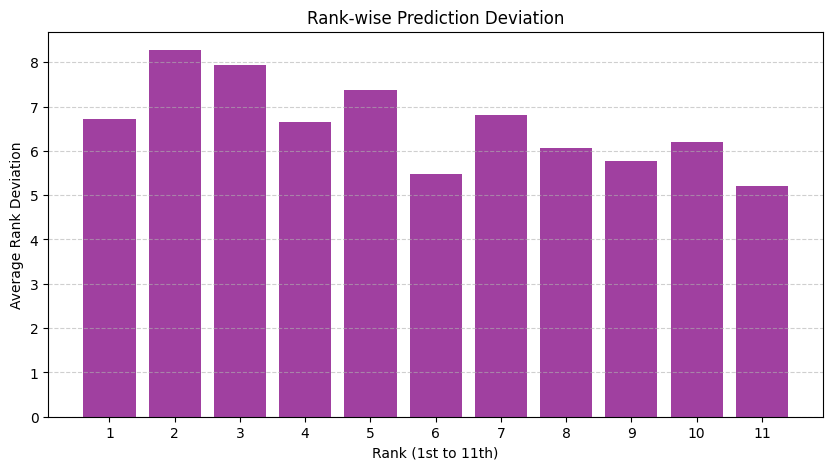

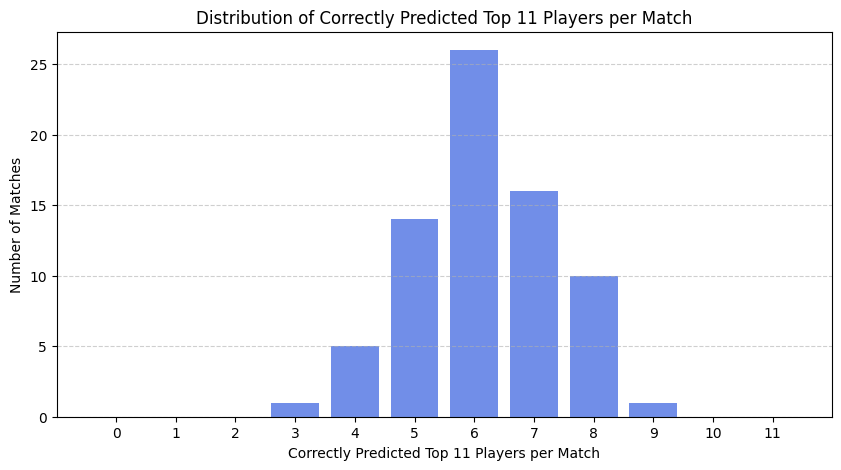

Average Number of Players Predicted Correctly in Top 11: 6.083333333333333
Average Total Fantasy Points of Actual Top 11 Players: 773.16
Average Total Fantasy Points of Predicted Top 11 Players: 573.48
Average Total Fantasy Points of Predicted Top 11 Players (Actual): 508.63

Rank-wise Prediction Accuracy:
     Rank  Correct Predictions  Total Matches  Accuracy (%)
0      1                  8.0             73     10.958904
1      2                  4.0             73      5.479452
2      3                  1.0             73      1.369863
3      4                  6.0             73      8.219178
4      5                  7.0             73      9.589041
5      6                  2.0             73      2.739726
6      7                  6.0             73      8.219178
7      8                  3.0             73      4.109589
8      9                  4.0             73      5.479452
9     10                  2.0             73      2.739726
10    11                  4.0             

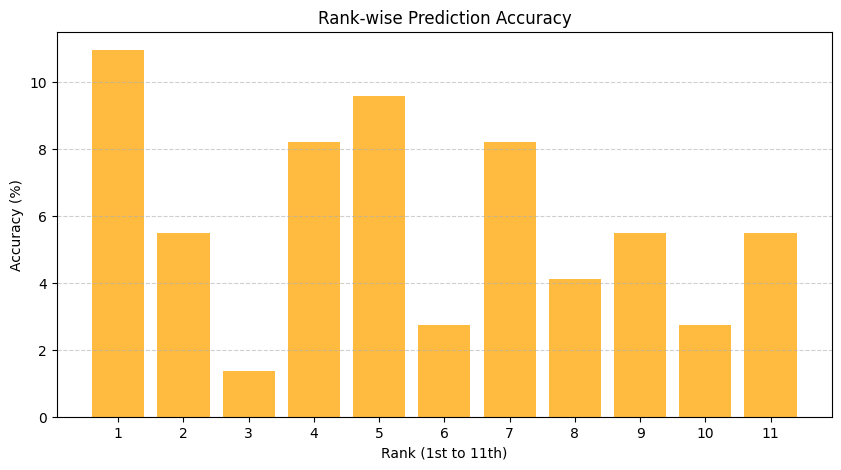


Rank-wise Fantasy Point Difference:
     Rank  Avg Fantasy Point Difference
0      1                    -77.136986
1      2                    -56.657534
2      3                    -41.931507
3      4                    -23.904110
4      5                    -30.219178
5      6                    -15.027397
6      7                    -15.410959
7      8                    -12.863014
8      9                     -1.191781
9     10                      7.945205
10    11                      1.863014


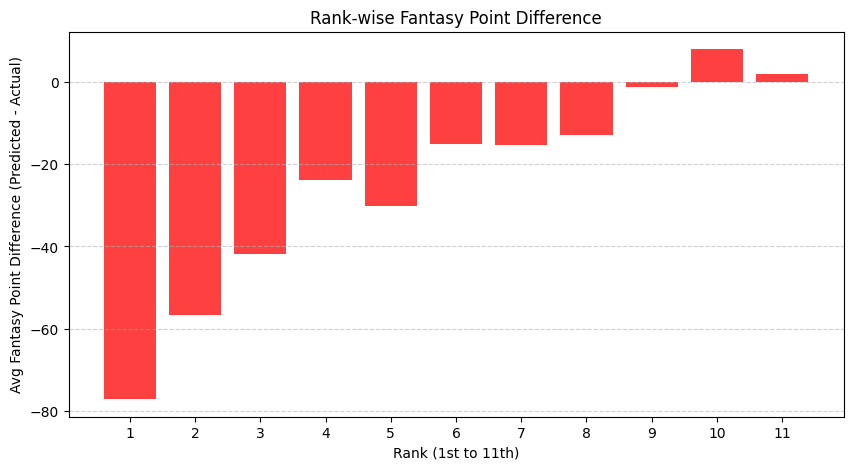

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_top_11_distribution(test_data):
    correct_counts = np.zeros(12)  # Index 0 to 11

    total_actual_fantasy = []
    total_predicted_fantasy = []
    top_11_predicted_actual_fantasy = []
    rank_deviation = np.zeros(11)    # Store average deviation per rank
    match_count = 0

    rank_match_counts = np.zeros(11)  # How many times rank 1, 2, ... 11 are predicted correctly
    fantasy_point_differences = []  # Difference in predicted vs actual fantasy points at each rank
    

    for match_id in test_data["match_id"].unique():
        match_data = test_data[test_data["match_id"] == match_id]
        match_count += 1

        # Get top 11 actual and predicted players
        top_actual = match_data.nlargest(11, "total_actual_fantasy_points").reset_index(drop=True)
        top_predicted = match_data.nlargest(11, "total_predicted_fantasy_points").reset_index(drop=True)

        actual_sorted = match_data.sort_values("total_actual_fantasy_points", ascending=False).reset_index(drop=True)

        top_actual_players = list(top_actual["player_id"])
        top_predicted_players = list(top_predicted["player_id"])

        # Count correctly predicted top players
        correct_count = len(set(top_actual_players) & set(top_predicted_players))
        correct_counts[correct_count] += 1  # Increment the respective bucket

        # Store total fantasy points for top 11 actual vs. predicted
        total_actual_fantasy.append(top_actual["total_actual_fantasy_points"].sum())
        total_predicted_fantasy.append(top_predicted["total_predicted_fantasy_points"].sum())
        top_11_predicted_actual_fantasy.append(top_predicted["total_actual_fantasy_points"].sum())


        # Track how many ranks are correctly predicted
        for i in range(11):
            if top_actual_players[i] == top_predicted_players[i]:
                rank_match_counts[i] += 1

            # Compute fantasy point difference at each rank
            fantasy_point_differences.append(
                top_predicted.loc[i, "total_actual_fantasy_points"] - top_actual.loc[i, "total_actual_fantasy_points"]
            )

            deviation = abs(actual_sorted[actual_sorted["player_id"] == top_predicted_players[i]].index[0] - i)
            rank_deviation[i] += deviation


    # Compute average rank deviation
    avg_rank_deviation = rank_deviation / match_count

    # Plot rank deviation
    plt.figure(figsize=(10, 5))
    plt.bar(range(1, 12), avg_rank_deviation, color='purple', alpha=0.75)
    plt.xlabel("Rank (1st to 11th)")
    plt.ylabel("Average Rank Deviation")
    plt.title("Rank-wise Prediction Deviation")
    plt.xticks(range(1, 12))
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()      
    

    # Plot the distribution of correctly predicted players per match
    plt.figure(figsize=(10, 5))
    plt.bar(range(12), correct_counts, color='royalblue', alpha=0.75)
    plt.xlabel("Correctly Predicted Top 11 Players per Match")
    plt.ylabel("Number of Matches")
    plt.xticks(range(12))
    plt.title("Distribution of Correctly Predicted Top 11 Players per Match")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

    # Compute average fantasy points and differences
    avg_correct_count = np.mean(correct_counts)
    avg_actual_fantasy = np.mean(total_actual_fantasy)
    avg_predicted_fantasy = np.mean(total_predicted_fantasy)
    avg_top_11_predicted_actual_fantasy = np.mean(top_11_predicted_actual_fantasy)

    print("Average Number of Players Predicted Correctly in Top 11:", avg_correct_count)
    print(f"Average Total Fantasy Points of Actual Top 11 Players: {avg_actual_fantasy:.2f}")
    print(f"Average Total Fantasy Points of Predicted Top 11 Players: {avg_predicted_fantasy:.2f}")
    print(f"Average Total Fantasy Points of Predicted Top 11 Players (Actual): {avg_top_11_predicted_actual_fantasy:.2f}")

    # Display Rank-wise Match Statistics
    rank_df = pd.DataFrame({
        "Rank": np.arange(1, 12),
        "Correct Predictions": rank_match_counts,
        "Total Matches": len(test_data["match_id"].unique()),
        "Accuracy (%)": (rank_match_counts / len(test_data["match_id"].unique())) * 100
    })
    print("\nRank-wise Prediction Accuracy:\n", rank_df)

    # Plot rank-wise prediction accuracy
    plt.figure(figsize=(10, 5))
    plt.bar(rank_df["Rank"], rank_df["Accuracy (%)"], color='orange', alpha=0.75)
    plt.xlabel("Rank (1st to 11th)")
    plt.ylabel("Accuracy (%)")
    plt.title("Rank-wise Prediction Accuracy")
    plt.xticks(range(1, 12))
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

    # Compute rank-wise fantasy point differences
    fantasy_point_diff_df = pd.DataFrame({
        "Rank": np.arange(1, 12),
        "Avg Fantasy Point Difference": np.mean(np.array(fantasy_point_differences).reshape(-1, 11), axis=0)
    })
    print("\nRank-wise Fantasy Point Difference:\n", fantasy_point_diff_df)

    # Plot fantasy point differences
    plt.figure(figsize=(10, 5))
    plt.bar(fantasy_point_diff_df["Rank"], fantasy_point_diff_df["Avg Fantasy Point Difference"], color='red', alpha=0.75)
    plt.xlabel("Rank (1st to 11th)")
    plt.ylabel("Avg Fantasy Point Difference (Predicted - Actual)")
    plt.title("Rank-wise Fantasy Point Difference")
    plt.xticks(range(1, 12))
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

# Run function
evaluate_top_11_distribution(test_data)


In [37]:
# print the columns 'batting_fantasy_points', 'bowling_fantasy_points', 'fielding_fantasy_points', 'predicted_batting_points', 'predicted_bowling_points', 'predicted_fielding_points', 'total_predicted_fantasy_points', 'total_actual_fantasy_points' as a df
test_data[['player', 'batting_fantasy_points', 'bowling_fantasy_points', 'fielding_fantasy_points', 'predicted_batting_points', 'predicted_bowling_points', 'predicted_fielding_points', 'total_predicted_fantasy_points', 'total_actual_fantasy_points']]

,player,batting_fantasy_points,bowling_fantasy_points,fielding_fantasy_points,predicted_batting_points,predicted_bowling_points,predicted_fielding_points,total_predicted_fantasy_points,total_actual_fantasy_points
494,JR Hazlewood,2,0,8,-3.317608,37.660637,2.801385,37.144414,10
495,JR Hazlewood,0,0,8,-9.926747,13.776644,2.440738,6.290635,8
496,JR Hazlewood,-3,29,8,-5.827538,49.319206,2.080092,45.571760,34
497,JR Hazlewood,0,0,0,-1.114896,37.274197,2.099858,38.259159,0
498,JR Hazlewood,5,50,0,-12.958225,16.281239,2.457590,5.780603,55
...,...,...,...,...,...,...,...,...,...
52442,R Klein,3,0,0,4.703509,28.514881,3.057766,36.276156,3
52461,R Trumpelmann,26,33,0,14.044472,50.216579,2.638408,66.899459,59
52462,R Trumpelmann,20,0,0,14.201897,59.174900,2.658174,76.034971,20
52463,R Trumpelmann,22,4,0,13.669435,57.439701,2.677940,73.787077,26


In [38]:
# create the test folder if it does not exist
!mkdir -p ../data/processed/evaluation
test_data.to_csv(f'../data/processed/evaluation/{k}_ODI.csv', index=False)

In [39]:
!pip install pytorch_tabnet

In [40]:
from pytorch_tabnet.tab_model import TabNetRegressor

# Data is already splitted into train_data and test_data

# Select features (excluding 'date')
X_train, y_train = train_data[batting_selected_features_rf], train_data["batting_fantasy_points"]
X_test, y_test = test_data[batting_selected_features_rf], test_data["batting_fantasy_points"]

# Convert DataFrame to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values.reshape(-1, 1)  # Reshape if it's a 1D array
y_test_np = y_test.values.reshape(-1, 1)

# Initialize model
tabnet = TabNetRegressor(optimizer_params=dict(lr=2e-2))

# Train the model
tabnet.fit(X_train_np, y_train_np, eval_set=[(X_test_np, y_test_np)], max_epochs=100, patience=10)


/home/ai21btech11012/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ai21btech11012/.local/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1279.55805| val_0_mse: 2118.65909|  0:00:09s
epoch 1  | loss: 932.02304| val_0_mse: 1005.83492|  0:00:10s
epoch 2  | loss: 923.16778| val_0_mse: 915.77461|  0:00:12s
epoch 3  | loss: 915.50305| val_0_mse: 806.34334|  0:00:14s
epoch 4  | loss: 909.48469| val_0_mse: 818.43824|  0:00:16s
epoch 5  | loss: 904.87397| val_0_mse: 816.44339|  0:00:17s
epoch 6  | loss: 903.51424| val_0_mse: 774.58795|  0:00:18s
epoch 7  | loss: 899.62009| val_0_mse: 769.56384|  0:00:20s
epoch 8  | loss: 897.24254| val_0_mse: 781.27189|  0:00:21s
epoch 9  | loss: 897.99729| val_0_mse: 762.05588|  0:00:22s
epoch 10 | loss: 893.66694| val_0_mse: 756.65567|  0:00:24s
epoch 11 | loss: 891.36608| val_0_mse: 759.16874|  0:00:25s
epoch 12 | loss: 891.78383| val_0_mse: 753.94075|  0:00:26s
epoch 13 | loss: 891.91726| val_0_mse: 756.55833|  0:00:28s
epoch 14 | loss: 889.65007| val_0_mse: 756.85451|  0:00:29s
epoch 15 | loss: 892.51878| val_0_mse: 761.75142|  0:00:30s
epoch 16 | loss: 888.92889| val_0_mse

/home/ai21btech11012/.local/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [41]:
# Evaluate model on MSE, MAE, RMSE, R2 Score
y_pred_batting = tabnet.predict(X_test_np)
mse = mean_squared_error(y_test, y_pred_batting)
mae = mean_absolute_error(y_test, y_pred_batting)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_batting)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 748.16
MAE: 19.29
RMSE: 27.35
R2 Score: 0.12


In [42]:
# Select features (excluding 'date')
X_train, y_train = train_data[bowling_selected_features], train_data["bowling_fantasy_points"]
X_test, y_test = test_data[bowling_selected_features], test_data["bowling_fantasy_points"]

# Convert DataFrame to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values.reshape(-1, 1)  # Reshape if it's a 1D array
y_test_np = y_test.values.reshape(-1, 1)

# Initialize model
tabnet = TabNetRegressor(optimizer_params=dict(lr=2e-2))

# Train the model
tabnet.fit(X_train_np, y_train_np, eval_set=[(X_test_np, y_test_np)], max_epochs=100, patience=10)


/home/ai21btech11012/.local/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 918.87708| val_0_mse: 1451.87159|  0:00:01s
epoch 1  | loss: 678.6554| val_0_mse: 854.30009|  0:00:03s
epoch 2  | loss: 673.48682| val_0_mse: 780.90833|  0:00:05s
epoch 3  | loss: 666.86269| val_0_mse: 761.48155|  0:00:07s
epoch 4  | loss: 663.85406| val_0_mse: 775.19739|  0:00:09s
epoch 5  | loss: 665.28128| val_0_mse: 760.64067|  0:00:11s
epoch 6  | loss: 661.20001| val_0_mse: 756.42968|  0:00:13s
epoch 7  | loss: 660.61787| val_0_mse: 743.854 |  0:00:14s
epoch 8  | loss: 662.47324| val_0_mse: 780.21554|  0:00:16s
epoch 9  | loss: 662.82677| val_0_mse: 749.69742|  0:00:18s
epoch 10 | loss: 658.36508| val_0_mse: 745.77345|  0:00:20s
epoch 11 | loss: 660.97636| val_0_mse: 750.0098|  0:00:22s
epoch 12 | loss: 653.24143| val_0_mse: 745.46548|  0:00:24s
epoch 13 | loss: 653.5851| val_0_mse: 759.86671|  0:00:26s
epoch 14 | loss: 657.28274| val_0_mse: 753.60253|  0:00:28s
epoch 15 | loss: 650.55864| val_0_mse: 744.42869|  0:00:29s
epoch 16 | loss: 651.95099| val_0_mse: 755.

/home/ai21btech11012/.local/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [43]:
# Evaluate model on MSE, MAE, RMSE, R2 Score
y_pred_bowling = tabnet.predict(X_test_np)
mse = mean_squared_error(y_test, y_pred_bowling)
mae = mean_absolute_error(y_test, y_pred_bowling)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_bowling)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 743.85
MAE: 17.14
RMSE: 27.27
R2 Score: 0.22


In [44]:
# Select features (excluding 'date')
X_train, y_train = train_data[fielding_selected_features], train_data["fielding_fantasy_points"]
X_test, y_test = test_data[fielding_selected_features], test_data["fielding_fantasy_points"]

# Convert DataFrame to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values.reshape(-1, 1)  # Reshape if it's a 1D array
y_test_np = y_test.values.reshape(-1, 1)

# Initialize model
tabnet = TabNetRegressor(optimizer_params=dict(lr=2e-2))

# Train the model
tabnet.fit(X_train_np, y_train_np, eval_set=[(X_test_np, y_test_np)], max_epochs=100, patience=10)


# Evaluate model on MSE, MAE, RMSE, R2 Score
y_pred_fielding = tabnet.predict(X_test_np)
mse = mean_squared_error(y_test, y_pred_fielding)
mae = mean_absolute_error(y_test, y_pred_fielding)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_fielding)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")    

/home/ai21btech11012/.local/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 39.73642| val_0_mse: 34.29431|  0:00:01s
epoch 1  | loss: 35.7313 | val_0_mse: 33.91133|  0:00:03s
epoch 2  | loss: 35.75532| val_0_mse: 32.544  |  0:00:05s
epoch 3  | loss: 35.56777| val_0_mse: 33.38395|  0:00:07s
epoch 4  | loss: 35.39246| val_0_mse: 32.63644|  0:00:09s
epoch 5  | loss: 35.34694| val_0_mse: 32.82768|  0:00:11s
epoch 6  | loss: 35.21409| val_0_mse: 32.82402|  0:00:13s
epoch 7  | loss: 34.91512| val_0_mse: 33.06608|  0:00:15s
epoch 8  | loss: 35.01041| val_0_mse: 32.41775|  0:00:16s
epoch 9  | loss: 35.14762| val_0_mse: 32.58201|  0:00:18s
epoch 10 | loss: 34.89129| val_0_mse: 33.10703|  0:00:20s
epoch 11 | loss: 34.99405| val_0_mse: 32.29593|  0:00:22s
epoch 12 | loss: 35.00242| val_0_mse: 32.75957|  0:00:24s
epoch 13 | loss: 34.90138| val_0_mse: 32.56724|  0:00:26s
epoch 14 | loss: 34.7329 | val_0_mse: 32.46288|  0:00:28s
epoch 15 | loss: 34.89036| val_0_mse: 32.60693|  0:00:30s
epoch 16 | loss: 34.80216| val_0_mse: 32.21619|  0:00:32s
epoch 17 | los

epoch 18 | loss: 34.72514| val_0_mse: 32.44937|  0:00:35s
epoch 19 | loss: 34.90761| val_0_mse: 32.12645|  0:00:38s
epoch 20 | loss: 34.82142| val_0_mse: 32.41439|  0:00:39s
epoch 21 | loss: 34.7562 | val_0_mse: 32.37785|  0:00:41s
epoch 22 | loss: 34.5908 | val_0_mse: 32.27983|  0:00:43s
epoch 23 | loss: 34.80596| val_0_mse: 32.1373 |  0:00:45s
epoch 24 | loss: 34.81913| val_0_mse: 32.22351|  0:00:47s
epoch 25 | loss: 34.90612| val_0_mse: 32.69756|  0:00:48s
epoch 26 | loss: 34.78673| val_0_mse: 32.68379|  0:00:50s
epoch 27 | loss: 34.84414| val_0_mse: 32.38053|  0:00:52s
epoch 28 | loss: 34.76184| val_0_mse: 32.27704|  0:00:54s
epoch 29 | loss: 34.72466| val_0_mse: 32.44443|  0:00:56s

Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_mse = 32.12645


/home/ai21btech11012/.local/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


MSE: 32.13
MAE: 4.18
RMSE: 5.67
R2 Score: 0.12


In [45]:
# Combine the predictions of the 3 models and evaluate the combined model on MSE, MAE, RMSE, R2 Score
# Store predictions in test data
test_data2 = test_data.copy()  # Avoid modifying the original dataframe
test_data2["predicted_batting_points"] = y_pred_batting
test_data2["predicted_bowling_points"] = y_pred_bowling
test_data2["predicted_fielding_points"] = y_pred_fielding

# Compute total predicted fantasy points
test_data2["total_predicted_fantasy_points"] = (
    test_data2["predicted_batting_points"] + 
    test_data2["predicted_bowling_points"] + 
    test_data2["predicted_fielding_points"]
)

# Compute total actual fantasy points
test_data2["total_actual_fantasy_points"] = (
    test_data2["batting_fantasy_points"] + 
    test_data2["bowling_fantasy_points"] + 
    test_data2["fielding_fantasy_points"]
)

# Compute evaluation metrics
mse = mean_squared_error(test_data2["total_actual_fantasy_points"], test_data2["total_predicted_fantasy_points"])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data2["total_actual_fantasy_points"], test_data2["total_predicted_fantasy_points"])
r2 = r2_score(test_data2["total_actual_fantasy_points"], test_data2["total_predicted_fantasy_points"])

# Print final evaluation metrics
print(f"Final Evaluation Metrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")



Final Evaluation Metrics:
MSE: 1528.90
RMSE: 39.10
MAE: 30.84


## (b) FT-Transformer (Feature Tokenizer Transformer)
- Treats each feature as a separate token (like words in NLP).
- Captures complex feature interactions effectively.
- Outperforms tree-based models on some tabular datasets.

In [46]:
!pip install rtdl

In [47]:
import torch
import rtdl
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from torch.optim.lr_scheduler import CosineAnnealingLR


# Select features (excluding 'date')
X_train, y_train = train_data[batting_selected_features_rf], train_data["batting_fantasy_points"]
X_test, y_test = test_data[batting_selected_features_rf], test_data["batting_fantasy_points"]

# Convert DataFrame to NumPy arrays
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32).reshape(-1, 1)
y_test_np = y_test.values.astype(np.float32).reshape(-1, 1)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_np)
X_test_tensor = torch.tensor(X_test_np)
y_train_tensor = torch.tensor(y_train_np)
y_test_tensor = torch.tensor(y_test_np)

# Define FT-Transformer model
ft_model_batting = rtdl.FTTransformer.make_baseline(
    n_num_features=X_train.shape[1],
    cat_cardinalities=None,  # No categorical features
    last_layer_query_idx=[-1],  # Only the last feature is used for regression
    d_token=64,  # Token dimension
    n_blocks=3,  # Number of transformer blocks
    attention_dropout=0.1,
    ffn_dropout=0.1,
    ffn_d_hidden=128,  # Hidden dimension for the feed-forward network
    residual_dropout=0.1,  # Dropout for residual connections
    d_out=1  # Output dimension (1 for regression)
)

# Move model to GPU if available
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")  # Use GPU 1
# device = "cpu"
ft_model_batting.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(ft_model_batting.parameters(), lr=2e-3, weight_decay=1e-5)
scheduler = CosineAnnealingLR(optimizer, T_max=100)
loss_fn = torch.nn.MSELoss()

# Training loop
epochs = 100
for epoch in range(epochs):
    ft_model_batting.train()
    optimizer.zero_grad()
    
    # Pass numerical features as `x_num` and None as `x_cat`
    y_pred = ft_model_batting(X_train_tensor.to(device), None).squeeze()
    
    loss = loss_fn(y_pred, y_train_tensor.to(device).squeeze())
    loss.backward()
    optimizer.step()
    scheduler.step()

In [48]:
# Evaluate model
ft_model_batting.eval()
with torch.no_grad():
    y_pred_batting = ft_model_batting(X_test_tensor.to(device)).cpu().numpy()

# Compute metrics
mse = mean_squared_error(y_test_np, y_pred_batting)
mae = mean_absolute_error(y_test_np, y_pred_batting)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred_batting)

print(f"FT-Transformer Results:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


TypeError: forward() missing 1 required positional argument: 'x_cat'

## AUTOSKLEARN
(a) AutoML with Auto-sklearn

In [ ]:
!pip install auto-sklearn

     |████████████████████████████████| 6.5 MB 1.9 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.4 MB 123 kB/s eta 0:00:011
     |████████████████████████████████| 4.9 MB 372 kB/s eta 0:00:011     |█████████████████▌              | 2.7 MB 41.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 26.2 MB/s eta 0:00:01
     |████████████████████████████████| 24.9 MB 28.3 MB/s eta 0:00:01
     |████████████████████████████████| 966 kB 28.0 MB/s eta 0:00:01
     |████████████████████████████████| 260 kB 41.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 43.4 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 56 kB 951 kB/s  eta 0:00:01
     |████████████████████████████████| 43 kB 338 kB/s  eta 0:00:01
     |████████████████████████████████| 287 kB 37.

In [ ]:
!pip install -U "scikit-learn<1.3"

     |████████████████████████████████| 9.8 MB 258 kB/s eta 0:00:01
ERROR: auto-sklearn 0.15.0 has requirement scikit-learn<0.25.0,>=0.24.0, but you'll have scikit-learn 1.2.2 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [ ]:
from autosklearn.regression import AutoSklearnRegressor


# Select features (excluding 'date')
X_train, y_train = train_data[batting_selected_features_rf], train_data["batting_fantasy_points"]
X_test, y_test = test_data[batting_selected_features_rf], test_data["batting_fantasy_points"]


# Initialize AutoML
automl = AutoSklearnRegressor(time_left_for_this_task=600, per_run_time_limit=30)

# Train model
automl.fit(X_train, y_train)

# Predict
y_pred_batting_automl = automl.predict(X_test)

TypeError: C function sklearn.utils._vector_sentinel.__pyx_fuse_0vector_to_nd_array has wrong signature (expected PyArrayObject *(std::vector<__pyx_t_7sklearn_5utils_9_typedefs_DTYPE_t>  *), got PyArrayObject *(std::vector<__pyx_t_7sklearn_5utils_9_typedefs_float64_t>  *))

ImportError: cannot import name 'TabularConfig' from 'transformers' (/home/ai21btech11012/.local/lib/python3.8/site-packages/transformers/__init__.py)